# Cats vs Dogs Keras

In [34]:
import os
import numpy as np

In [30]:
os.getcwd()

'/home/ankitt'

In [13]:
import sys
print(sys.version)

3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [27]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [56]:
import glob
filelist_1 = glob.glob('test/*.jpg')
filelist_2 = glob.glob('train/*.jpg')

In [131]:
test = [np.array(skimage.io.imread(fname)) for fname in filelist_1]

In [132]:
train = [np.array(skimage.io.imread(fname)) for fname in filelist_2]

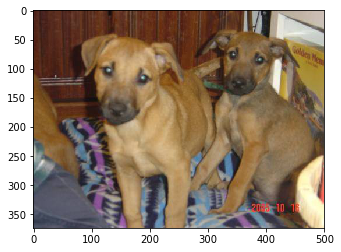

In [134]:
plt.imshow(test[12499])

In [135]:
len(train)

25000

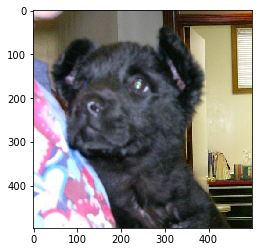

In [65]:
plt.imshow(train[24999])

In [164]:
train[24999].shape

(25, 25, 3)

In [71]:
filelist_2[24997]

'train/cat.6783.jpg'

In [72]:
train_class=[]
for i in filelist_2:
    if 'dog' in i:
        train_class.append(1)
    elif 'cat' in i:
        train_class.append(0)
    else:
        train_class.append(9)

# See distribution

In [80]:
np.bincount(train_class)

array([12500, 12500])

In [115]:
n_classes = len(set(train_class))

# Resizing, Normalising Images

In [88]:
from scipy.misc import imresize

In [137]:
im_w,im_h=25,25

In [138]:
for i in range(0,len(train)):

    train[i] =imresize(train[i],(im_w,im_h))

In [139]:
for i in range(0,len(train)):

    train[i] =train[i]/255.

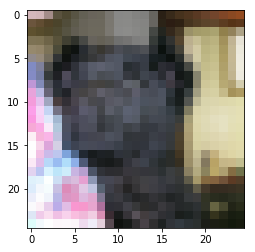

In [140]:
plt.imshow(train[24999])

# train validation split

In [158]:
train_img= np.array(train[0:20000])
val_img= np.array(train[20000:24999])
train_cl= np.array(train_class[0:20000])
val_cl= np.array(train_class[20000:24999])

In [159]:
if K.image_dim_ordering() == 'th':
    train_img = train_img.reshape(train_img.shape[0], 3, im_h, im_w)
    val_img = val_img.reshape(val_img.shape[0], 3, im_h, im_w)
    input_shape = (3, im_h, im_w)
else:
    train_img = train_img.reshape(train_img.shape[0], im_h, im_w, 3)
    val_img = val_img.reshape(val_img.shape[0], im_h, im_w, 3)
    input_shape = (im_h, im_w, 3)
    
print("input shape is: {}".format(input_shape))
print("train shape is: {}".format(train_img.shape))
print("test shape is: {}".format(val_img.shape))

input shape is: (3, 25, 25)
train shape is: (20000, 3, 25, 25)
test shape is: (4999, 3, 25, 25)


In [160]:
train_cl = np_utils.to_categorical(train_cl, nb_classes=n_classes)
val_cl = np_utils.to_categorical(val_cl, nb_classes=n_classes)

#Model

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import  SGD
from keras.utils import np_utils
from keras import backend as K

Using Theano backend.


In [161]:
train_cl.shape

(20000, 2)

In [149]:
#hyperparameteres
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#compile model
sgd = SGD(lr=1, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [156]:
import logging
logger = logging.getLogger()
#logger.setLevel(logging.INFO)
logging.info("test")

INFO:root:test


In [ ]:
batch_size = 256
#using 20 epochs only, for runtime considerations
nb_epoch = 20


model.fit(train_img, train_cl, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(val_img, val_cl))
         
        
model.save('model1.h5')


Train on 20000 samples, validate on 4999 samples
Epoch 1/20
20000/20000 [==============================] - 53s - loss: 0.5133 - acc: 0.7478 - val_loss: 0.6003 - val_acc: 0.6919

In [163]:
score = model.evaluate(val_img, val_cl, verbose=1)
pred_cl = model.predict_classes(val_img)

print('Test score:', score[0])
#test score .745
print('Test accuracy:', score[1])
#test accuracy: .673

4960/4999 [============================>.] - ETA: 0s

INFO (theano.gof.compilelock): Refreshing lock /home/ankitt/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-3.6.0-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/ankitt/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-3.6.0-64/lock_dir/lock


4999/4999 [==============================] - 5s     

In [165]:
for i in range(0,len(test)):
    test[i]= imresize(test[i],(im_w,im_h))
    test[i] =test[i]/255.

test_img= np.array(test)

if K.image_dim_ordering() == 'th':
    test_img = test_img.reshape(test_img.shape[0], 3, im_h, im_w)
else:
    test_img = test_img.reshape(test_img.shape[0], im_h, im_w, 3)
    


12500/12500 [==============================] - 13s     

In [174]:
pred_val = model.predict(test_img)

In [175]:
import csv
csv_out = open("submission.csv",'w')
mywriter = csv.writer(csv_out)
mywriter.writerow(pred_val.tolist())
csv_out.close()